In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [2]:
data_root = './data'

transform = transforms.Compose([
    transforms.ToTensor(),
])

mnist = datasets.MNIST(
    root=data_root, train=True, download=True, transform=transform)

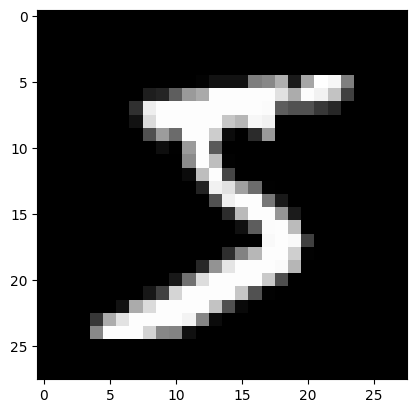

In [3]:
image, label = mnist[0]
plt.imshow(image[0].reshape(28,28), cmap='gray')

<class 'torch.Tensor'>


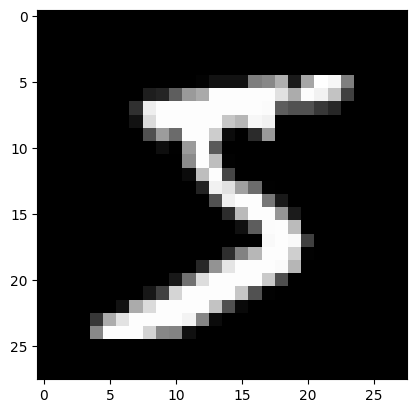

In [5]:
forward_image = image[0].reshape(28,28)
print(type(forward_image))
plt.imshow(forward_image, cmap='gray')

In [13]:
terminal_step = 100

beta, _ = torch.sort(torch.rand(1, terminal_step))

In [14]:
print(beta)
print(beta[0, 1])

tensor([[0.0052, 0.0065, 0.0326, 0.0501, 0.0709, 0.0730, 0.0752, 0.0834, 0.0875,
         0.0907, 0.1046, 0.1213, 0.1522, 0.1613, 0.1725, 0.1749, 0.1961, 0.2028,
         0.2090, 0.2109, 0.2170, 0.2188, 0.2196, 0.2252, 0.2533, 0.2648, 0.2679,
         0.2742, 0.2871, 0.2903, 0.2939, 0.3174, 0.3261, 0.3293, 0.3461, 0.3490,
         0.3588, 0.3592, 0.3687, 0.3724, 0.3752, 0.3932, 0.4068, 0.4157, 0.4240,
         0.4361, 0.4387, 0.4478, 0.4599, 0.4705, 0.4778, 0.5014, 0.5344, 0.5395,
         0.5405, 0.5572, 0.5722, 0.5778, 0.6159, 0.6196, 0.6239, 0.6282, 0.6393,
         0.6461, 0.6613, 0.6699, 0.6771, 0.7068, 0.7175, 0.7236, 0.7247, 0.7377,
         0.7528, 0.7562, 0.7605, 0.7676, 0.7696, 0.7764, 0.7789, 0.7815, 0.7909,
         0.7911, 0.8072, 0.8189, 0.8280, 0.8283, 0.8473, 0.8583, 0.8741, 0.8927,
         0.9073, 0.9285, 0.9316, 0.9358, 0.9593, 0.9665, 0.9866, 0.9880, 0.9948,
         0.9989]])
tensor(0.0065)


In [27]:
def cal_alpha(beta, step):
    result = torch.tensor(1).float()
    
    for i in range(0, step+1):
        tmp = beta[0, i]
        result *= (1-tmp)

    return result

In [28]:
print(cal_alpha(beta, 0))


tensor(0.9948)


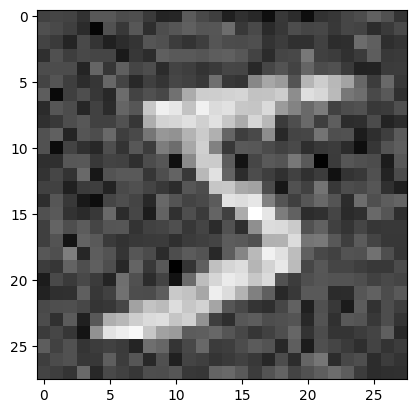

In [32]:
noise_t = torch.randn(28,28)
alpha_t = cal_alpha(beta, 5)

# forward 과정
z_t = forward_image * torch.sqrt(alpha_t) + noise_t * (1-torch.sqrt(alpha_t))

plt.imshow(z_t, cmap='gray')

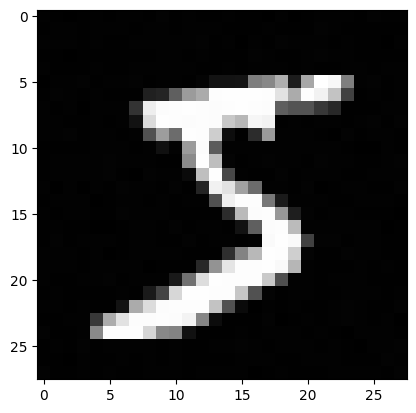

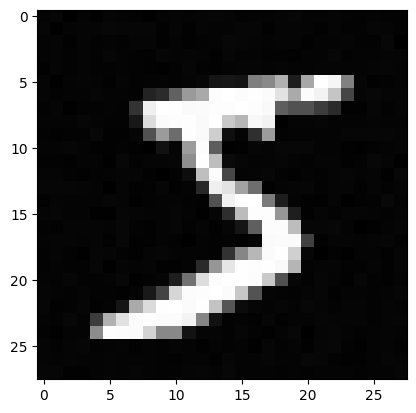

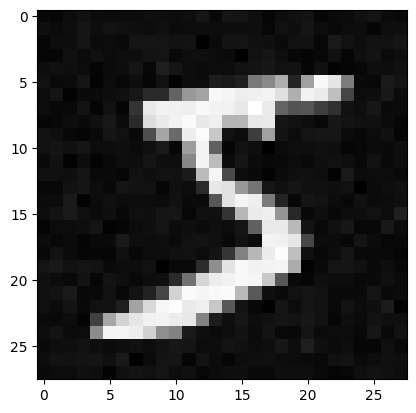

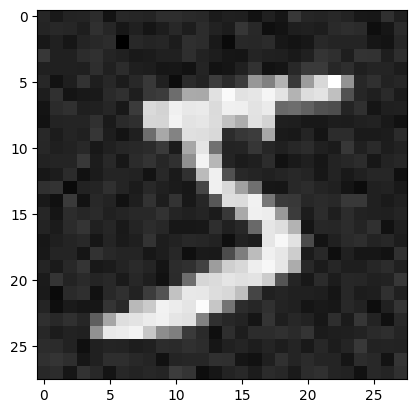

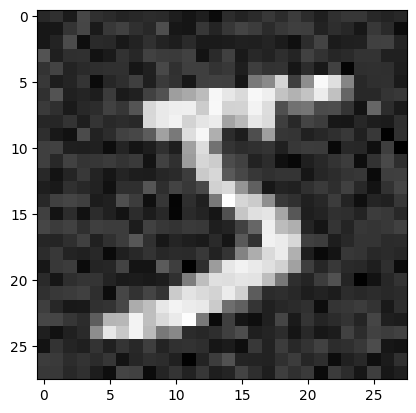

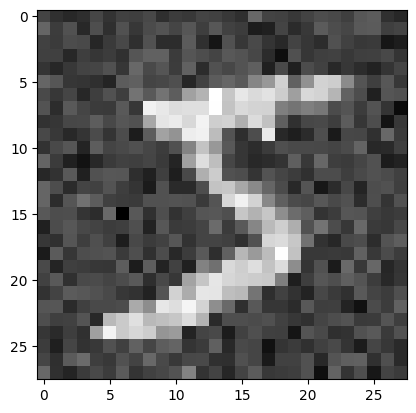

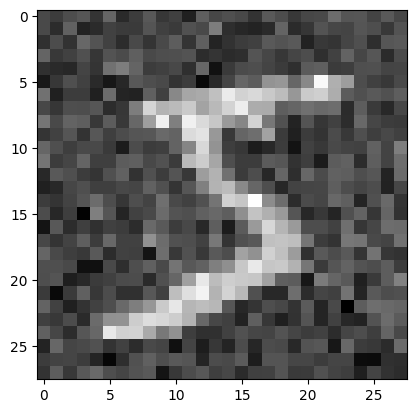

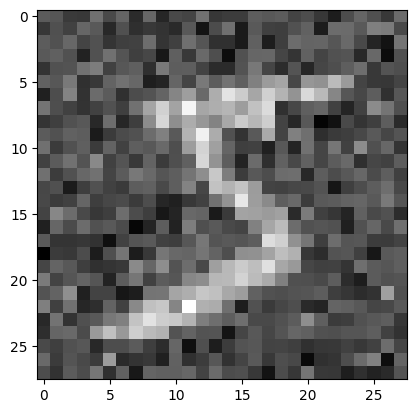

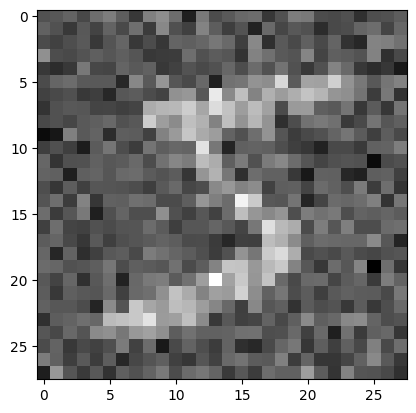

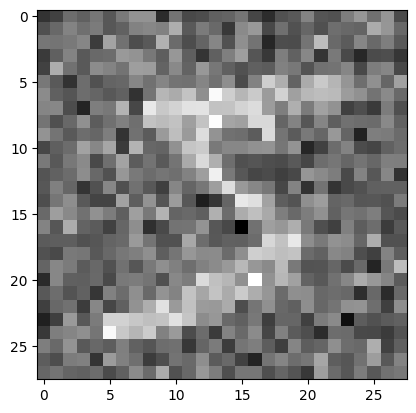

In [35]:
# 점진적 forward 과정

for t in range(0, 10):
    noise_t = torch.randn(28,28)
    alpha_t = cal_alpha(beta, t)

    # forward 과정
    z_t = forward_image * torch.sqrt(alpha_t) + noise_t * (1-torch.sqrt(alpha_t))
    plt.figure()
    plt.imshow(z_t, cmap='gray')